In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import torch
import seaborn as sns
# matplotlib.rc('text', usetex = True)


In [2]:
exp_dir = "/media/user/nvme/contrastive_experiments/experiments_fsd50k_layerwise/"

In [3]:
def ckpt_info(f):
    
    # val_acc = float(f.split("/")[-1].replace(".pth", "").split("val_acc=")[-1])
    val_acc = torch.load(f)['val_acc']
    #print(val_acc)
    fconly = "_fconly_" in f
    is_contrastive = "_constrastive_" in f
    if is_contrastive:
        model_type = "Contrastive"
    else:
        model_type = 'Supervised'
    if fconly:
        model_type_alt = model_type+",fconly"
    else:
        model_type_alt = model_type+",full"
    #print(fconly, is_contrastive)
    res = {
        "val_mAP" : val_acc,
        "fconly": fconly,
        "model_type": model_type,
        "layer": int(f.split("/")[-4].replace("layer","")),
        "model_type_alt": model_type_alt
    }
    return res

In [4]:
def get_model_info(model_dir):
    ckpt = glob.glob(os.path.join(model_dir, "ckpts", "*"))[0]
    #print(ckpt)
    return ckpt_info(ckpt)

In [5]:
from tqdm import notebook

In [6]:
records = []
for i in notebook.tqdm(range(1, 12)):
    layer_dir = os.path.join(exp_dir, f"layer{i}")
    # print(layer_dir)
    models = glob.glob(os.path.join(layer_dir, "*"))
    # print(models)
    for mod in models:
        rec = get_model_info(mod)
        records.append(rec)

  0%|          | 0/11 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame.from_records(records)

In [8]:
# df[df['layer'] == 10]

In [9]:
df_fconly_contrastive = df[df['model_type_alt'] == "Contrastive,fconly"]
df_fconly_supervised = df[df['model_type_alt'] == "Supervised,fconly"]
df_full_contrastive = df[df['model_type_alt'] == "Contrastive,full"]
df_full_supervised = df[df['model_type_alt'] == "Supervised,full"]

In [10]:
df_final = df_fconly_contrastive.append(df_fconly_supervised).append(df_full_contrastive).append(df_full_supervised)

In [11]:
import seaborn as sns

In [12]:
colours = sns.color_palette("deep", 4)

In [13]:
colours

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

In [22]:
df_final.shape

(132, 5)

In [14]:
supervised_fulls = [
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fullmodel_mixup_rs8881/ckpts/epoch=099_tr_loss=0.032847_tr_acc=0.656600_val_acc=0.442738.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fullmodel_mixup_rs8882/ckpts/epoch=088_tr_loss=0.033046_tr_acc=0.653523_val_acc=0.438439.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fullmodel_mixup_rs8883/ckpts/epoch=096_tr_loss=0.032655_tr_acc=0.660639_val_acc=0.437120.pth")['val_acc'],
]

In [15]:
contrastive_fulls = [
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_v3/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fullmodel_r3/ckpts/epoch=090_tr_loss=0.031432_tr_acc=0.683135_val_acc=0.423625.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fullmodel_rs8882/ckpts/epoch=087_tr_loss=0.031587_tr_acc=0.682434_val_acc=0.419837.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fullmodel_rs8883/ckpts/epoch=087_tr_loss=0.031832_tr_acc=0.675464_val_acc=0.423846.pth")['val_acc'],
]

In [16]:
supervised_fcs = [
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fconly_mixup_rs8881/ckpts/epoch=082_tr_loss=0.039606_tr_acc=0.489563_val_acc=0.457319.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fconly_mixup_rs8882/ckpts/epoch=056_tr_loss=0.039820_tr_acc=0.488300_val_acc=0.453529.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x128_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_supervised_ft_fconly_mixup_rs8883/ckpts/epoch=097_tr_loss=0.039405_tr_acc=0.494722_val_acc=0.460292.pth")['val_acc'],
]

In [17]:
contrastive_fcs = [
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_v3/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fconly_r2/ckpts/epoch=095_tr_loss=0.042163_tr_acc=0.479335_val_acc=0.325483.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fconly_rs8882/ckpts/epoch=093_tr_loss=0.042339_tr_acc=0.473193_val_acc=0.315465.pth")['val_acc'],
    torch.load("/media/user/nvme/contrastive_experiments/experiments_fsd50k_latest/cnn12_1x_full_tr_1x64_Adam_1e-3_warmupcosine_wd0._fixed_lr_scaling_randomgain_gaussiannoise_timemask_bgnoise_nolineareval_ft_fconly_rs8883/ckpts/epoch=090_tr_loss=0.042204_tr_acc=0.479826_val_acc=0.320906.pth")['val_acc'],
]

In [18]:
supervised_full_val = np.mean(supervised_fulls)
contrastive_full_val = np.mean(contrastive_fulls)
supervised_fc_val = np.mean(supervised_fcs)
contrastive_fc_val = np.mean(contrastive_fcs)

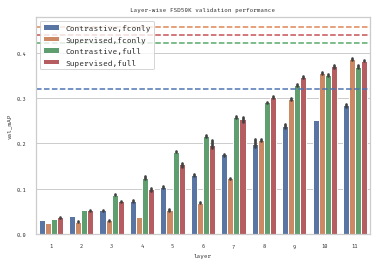

In [24]:
sns.set_theme(style="whitegrid", palette="deep", font='Fira Mono', font_scale=0.5)
colours = sns.color_palette("deep", 4)
ax = sns.barplot(x='layer', y='val_mAP', hue='model_type_alt', data=df_final)


ax.axhline(contrastive_fc_val, ls='--', color=colours[0])
ax.axhline(supervised_fc_val, ls='--', color=colours[1])
ax.axhline(contrastive_full_val, ls='--', color=colours[2])
ax.axhline(supervised_full_val, ls='--', color=colours[3])

ax.legend(loc="upper left", fontsize=8)
ax.set_title("Layer-wise FSD50K validation performance")
ax.figure.savefig("/home/user/Desktop/fsd50k_layerwise.png", dpi=300, bbox_inches='tight')